In [2]:
# imports
import pandas as pd
import numpy as np

In [59]:
# imports viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
# creating the data frame
df = pd.read_csv('Classified Data', index_col=0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
# import standard scaller
from sklearn.preprocessing import StandardScaler

In [7]:
# instantiating the method
scaler = StandardScaler()

In [9]:
# fitting the scaller to my data (excluding the target)
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# create the array of scaled features
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [17]:
# save the new scaled features into a dataframe
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [20]:
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [21]:
from sklearn.model_selection import train_test_split

In [38]:
# train test split
from sklearn.model_selection import train_test_split
X = df_scaled

y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [39]:
# use the KNN to predict the class
from sklearn.neighbors import KNeighborsClassifier

# instantiating the KNN algorithm
KNN = KNeighborsClassifier(n_neighbors=1)

In [40]:
# fit the model
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [41]:
# time for predictions
pred = KNN.predict(X_test)

In [45]:
# evaluate our model
from sklearn.metrics import classification_report, confusion_matrix

# print the confusion matrix
print(confusion_matrix(y_test, pred))

# print the clasfication report
print(classification_report(y_test, pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [48]:
# use the Elbow Method to define the optimum number for K
error_rate = []

# we start by iterating thorugh the number of Ks
for i in range(1, 40):
    
    # we define our model with K = i
    KNN = KNeighborsClassifier(n_neighbors=i)
    
    # we fit the model on the training data
    KNN.fit(X_train, y_train)
    
    # time for predictions
    pred_i = KNN.predict(X_test)
    
    # we append the error to the error_rate list
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 0, 'K Value')

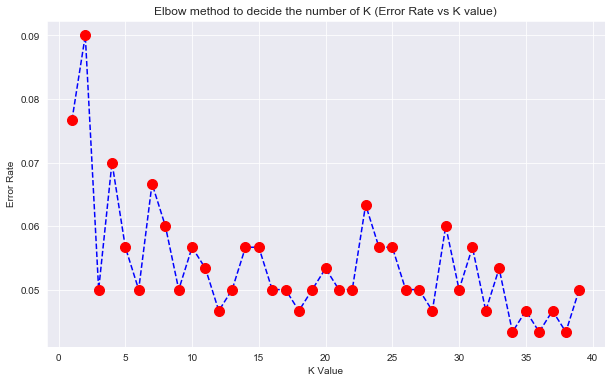

In [61]:
# now we can see how our error changes as the number of K increases

plt.figure(figsize = (10,6))
plt.plot(range(1, 40), error_rate, color = 'blue', ls = '--', marker = 'o', markerfacecolor='red', markeredgecolor = 'red', markersize = 10)
plt.title('Elbow method to decide the number of K (Error Rate vs K value)')
plt.ylabel('Error Rate')
plt.xlabel('K Value')

#### Run the KNN Algorithm with K = 17

In [74]:
# instantiating the KNN algorithm with K = 17
KNN_17 = KNeighborsClassifier(n_neighbors=34)

# fit the model
KNN_17.fit(X_train, y_train)

# time for predictions
predictions = KNN_17.predict(X_test)

In [75]:
# print the confusion matrix
print(confusion_matrix(y_test, predictions))

# print the clasfication report
print(classification_report(y_test, predictions))

[[153   6]
 [  7 134]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

